In [103]:
import numpy as np
import pandas as pd
import sqlite3
import os
import calendar
from datetime import datetime
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#https://www.msci.com/documents/10199/8d97d244-4685-4200-a24c-3e2942e3adeb

In [104]:
data_path=r"D:\JupyterCode\MyQuantFinProject\Data"
data_file=f"{data_path}\\SPY_QQQ_ACWI_Nov20-April22.csv"

database_file=r'D:\JupyterCode\MyQuantFinProject\DataBase\FinTradeAnalytics.sqlite3'

result_path=r"D:\JupyterCode\MyQuantFinProject\Report"

# sample file=D:\JupyterCode\MyQuantFinProject\FundProjectDocs\Region


title="BEST-X"

tf_nPart=0

requiredMAData=False

buildtime = datetime.now().strftime('%d%m%y_%H%M')

title=f'{title}_{buildtime}'
print(title)

from_month_str='2020-11'
to_month_str='2022-05'


list_fund_name=[]
list_ex_fund=[]

BEST-X_040522_2352


In [105]:
print("Load Price Data")

df = pd.read_csv(data_file,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
df=df.loc[from_month_str:to_month_str,:]


df.index.set_names('date',inplace=True)
df=df.rename(columns={'Ticker':'symbol','close':'price'})

df=df[['symbol','price']]

list_fund_name=df['symbol'].unique()   

print(df.head())
print(df.tail())

Load Price Data
           symbol   price
date                     
2020-11-02    QQQ  269.98
2020-11-03    QQQ  274.65
2020-11-04    QQQ  286.91
2020-11-05    QQQ  294.39
2020-11-06    QQQ  294.61
           symbol   price
date                     
2022-04-25    SPY  428.51
2022-04-26    SPY  416.10
2022-04-27    SPY  417.27
2022-04-28    SPY  427.81
2022-04-29    SPY  412.00


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_10368\560104062.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df=df.loc[from_month_str:to_month_str,:]


In [106]:
print("Connect SQLite")
conn = sqlite3.connect(os.path.abspath(database_file))


def find_last_date_month(item):
  item=str(item)
  x = datetime.strptime(item, '%m-%Y')  

  end_date_object=x.replace(day = calendar.monthrange(x.year, x.month)[1]) 
  return   end_date_object
    


print("Load Invest Period")
period_df= pd.read_sql_query("select * from InvestPeriod where IsActive = 1", conn)
period_df['Start_Date']=pd.to_datetime(period_df['Start'],format='%m-%Y')
period_df['End_Date']=period_df['End'].apply(find_last_date_month)
period_df['IsSelected']=1
print(period_df.info())

#temp datra
#period_df=period_df.loc[:3]
print(period_df)


print("Validate Time Series To Test in InvestPeriod Table")
list_period=[]
for index, row in period_df.iterrows():
    list_period.append(row["Start_Date"]) # start
    list_period.append(row["End_Date"]) #end
    
#print(list_period)

start_test=list_period[0]

for idx in range(1,len(list_period)):
    #print(list_period[idx])
    if list_period[idx]<=list_period[idx-1]:
      raise Exception(f"Error: {list_period[idx]} must be greater than {list_period[idx-1]}")   

print("Time series validation completed")      


Connect SQLite
Load Invest Period
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       16 non-null     object        
 1   End         16 non-null     object        
 2   IsActive    16 non-null     int64         
 3   Start_Date  16 non-null     datetime64[ns]
 4   End_Date    16 non-null     datetime64[ns]
 5   IsSelected  16 non-null     int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 896.0+ bytes
None
      Start      End  IsActive Start_Date   End_Date  IsSelected
0   01-2014  12-2014         1 2014-01-01 2014-12-31           1
1   01-2015  12-2015         1 2015-01-01 2015-12-31           1
2   01-2016  08-2016         1 2016-01-01 2016-08-31           1
3   09-2016  07-2017         1 2016-09-01 2017-07-31           1
4   08-2017  03-2018         1 2017-08-01 2018-03-31           1
5   04-2018

In [107]:
print("Load All data from all fund to store in List")
dictPriceOfFund={}
list_startDate=[]
list_endDate=[]

for name in list_fund_name:
    
  fund_df=df.query('symbol==@name')
  fund_df=fund_df[['price']]
  fund_df.sort_index(inplace=True)  
    
    
  
  dictPriceOfFund[name]=fund_df
  print(f"============================={name}=============================")  
  print(fund_df.head(3))   
  print(fund_df.tail(3))  

  list_startDate.append(fund_df.index[0])
  list_endDate.append(fund_df.index[len(fund_df)-1])  
    
    

Load All data from all fund to store in List
=============================QQQ=============================
             price
date              
2020-11-02  269.98
2020-11-03  274.65
2020-11-04  286.91
             price
date              
2022-04-27  316.76
2022-04-28  328.01
2022-04-29  313.25
=============================ACWI=============================
            price
date             
2020-11-02  79.00
2020-11-03  80.45
2020-11-04  82.15
            price
date             
2022-04-27  92.27
2022-04-28  94.20
2022-04-29  91.73
=============================SPY=============================
             price
date              
2020-11-02  330.20
2020-11-03  336.03
2020-11-04  343.54
             price
date              
2022-04-27  417.27
2022-04-28  427.81
2022-04-29  412.00


In [108]:
print("Find latest date for starting test")
print(list_startDate)
latest_start_date=max(list_startDate)



print("Find  earliest date for ending test")
print( list_endDate)
earliest_start_date=min(list_endDate)

print("=========================================")
print('Latest start =',latest_start_date)
print('Earliest end =' ,earliest_start_date)


Find latest date for starting test
[Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-02 00:00:00')]
Find  earliest date for ending test
[Timestamp('2022-04-29 00:00:00'), Timestamp('2022-04-29 00:00:00'), Timestamp('2022-04-29 00:00:00')]
Latest start = 2020-11-02 00:00:00
Earliest end = 2022-04-29 00:00:00


In [109]:
first_month_to_test=period_df.loc[0,"Start_Date"]

if latest_start_date>first_month_to_test:
 print(f"Latest Start at {latest_start_date} is greater than {first_month_to_test}")   
 print("Find Range Fpr Starting Now!!!")
 for index, row in period_df.iterrows():
    #print( f"{index}: {row['Start_Date']} - {row['End_Date']}")
    if (latest_start_date>=row['Start_Date']) and (latest_start_date<=row['End_Date']):
        
        print( f"Found Start-Range = {index}: {row['Start_Date']} - {row['End_Date']}")
        period_df.loc[index,'Start_Date']=latest_start_date
        period_df.loc[index,'Start']=latest_start_date.strftime("%m-%Y")
        break
    else:
        period_df.loc[index,'IsSelected']=0
else:
 print(f"Test All range because Latest Start at {latest_start_date} is less than {first_month_to_test}") 
        
period_df=period_df.query("IsSelected==1")
period_df.reset_index(drop=True,inplace=True)
period_df

Latest Start at 2020-11-02 00:00:00 is greater than 2014-01-01 00:00:00
Find Range Fpr Starting Now!!!
Found Start-Range = 12: 2020-11-01 00:00:00 - 2021-03-31 00:00:00


,Start,End,IsActive,Start_Date,End_Date,IsSelected
0,11-2020,03-2021,1,2020-11-02,2021-03-31,1
1,04-2021,07-2021,1,2021-04-01,2021-07-31,1
2,08-2021,12-2021,1,2021-08-01,2021-12-31,1
3,01-2022,12-2022,1,2022-01-01,2022-12-31,1


In [110]:
# new version
last_month_to_test=period_df.loc[len(period_df)-1,'End_Date']
# print(last_month_to_test)

if earliest_start_date<last_month_to_test:
    
 print(f"Latest End at {earliest_start_date} is less than {last_month_to_test}")   
 print("Find Range For Finishing Now!!!")
 
 last_row_to_spot_end=period_df.shape[0];
 for index, row in period_df.iterrows():
    
    if (earliest_start_date>=row['Start_Date']) and (earliest_start_date<=row['End_Date']):
        
        print( f"Found End-Range = {index}: {row['Start_Date']} - {row['End_Date']}")
        period_df.loc[index,'End_Date']=earliest_start_date
        period_df.loc[index,'End']=earliest_start_date.strftime("%m-%Y")
        
        last_row_to_spot_end=index
        print(f"Update last row = {last_row_to_spot_end}")
        
        break
else:
 print(f"Test All range because Earliest end at {earliest_start_date} is less than {last_month_to_test}") 


if  last_row_to_spot_end<period_df.shape[0]:
 period_df=period_df.iloc[0:(last_row_to_spot_end+1),:]

period_df=period_df.reset_index(drop=True)        
period_df

# old verion
# if  earliest_start_date> period_df.loc[len(period_df)-1,'Start_Date']:
#   period_df.loc[len(period_df)-1,'End_Date']=earliest_start_date
# else:
#   raise Exception(f"Error {earliest_start_date} is less than start date of last period test at {period_df.loc[len(period_df)-1,'Start_Date']}")   


Latest End at 2022-04-29 00:00:00 is less than 2022-12-31 00:00:00
Find Range For Finishing Now!!!
Found End-Range = 3: 2022-01-01 00:00:00 - 2022-12-31 00:00:00
Update last row = 3


,Start,End,IsActive,Start_Date,End_Date,IsSelected
0,11-2020,03-2021,1,2020-11-02,2021-03-31,1
1,04-2021,07-2021,1,2021-04-01,2021-07-31,1
2,08-2021,12-2021,1,2021-08-01,2021-12-31,1
3,01-2022,04-2022,1,2022-01-01,2022-04-29,1


In [111]:
fundPerfByPeriod_df=period_df.copy()
period_df=None

fundPerfByPeriod_df["No.Month"]=((fundPerfByPeriod_df["End_Date"]-fundPerfByPeriod_df["Start_Date"])/np.timedelta64(1, 'M')).round(0)

fundPerfByPeriod_df['st'] = fundPerfByPeriod_df['Start_Date'].dt.strftime('%d%b%y')
fundPerfByPeriod_df['ed'] = fundPerfByPeriod_df['End_Date'].dt.strftime('%d%b%y')
fundPerfByPeriod_df['Period']= fundPerfByPeriod_df['st'].str.cat(fundPerfByPeriod_df['ed'], sep='-')
fundPerfByPeriod_df.drop(columns=['st','ed'],inplace=True)

fundPerfByPeriod_df

,Start,End,IsActive,Start_Date,End_Date,IsSelected,No.Month,Period
0,11-2020,03-2021,1,2020-11-02,2021-03-31,1,5.0,02Nov20-31Mar21
1,04-2021,07-2021,1,2021-04-01,2021-07-31,1,4.0,01Apr21-31Jul21
2,08-2021,12-2021,1,2021-08-01,2021-12-31,1,5.0,01Aug21-31Dec21
3,01-2022,04-2022,1,2022-01-01,2022-04-29,1,4.0,01Jan22-29Apr22


In [112]:
def cal_percent_return(item,fundTemp_df):
    
    start_from=item['Start_Date']
    end_to=item['End_Date']
    
    tempDF=fundTemp_df.loc[start_from:end_to,:]
    
    start_price=float(tempDF.iloc[0, 0])  
    end_price=float(tempDF.iloc[len(tempDF)-1, 0])
    
    print(f'{start_from} to {end_to} = {start_price} to {end_price}')
    
    invest_return =(end_price-start_price)/start_price*100
    invest_return=round(invest_return,1)
    #print(tempDF)                          
    print(f"Return=> : { start_price} - {end_price}= {invest_return} %")   
    return invest_return
                                                              
print("Calcualte percentage of Performance return for each fund as given period investment")


for x_name,fund_df in dictPriceOfFund.items():
    
    
  print(f"=========================={x_name}==================================================")

#   print(fund_df.info())

  print("----------------------Head---------------------------------------")
  print(fund_df.head())  
    
  print("----------------------Tail---------------------------------------")  
  print(fund_df.tail())
    
    
  print(f"==========================cal_percent_return==================================================")
  fundPerfByPeriod_df[x_name]=fundPerfByPeriod_df.apply(cal_percent_return,axis=1,args=(fund_df,))
  print("***********************************************************************************************")


Calcualte percentage of Performance return for each fund as given period investment
==========================QQQ==================================================
----------------------Head---------------------------------------
             price
date              
2020-11-02  269.98
2020-11-03  274.65
2020-11-04  286.91
2020-11-05  294.39
2020-11-06  294.61
----------------------Tail---------------------------------------
             price
date              
2022-04-25  329.58
2022-04-26  317.14
2022-04-27  316.76
2022-04-28  328.01
2022-04-29  313.25
==========================cal_percent_return==================================================
2020-11-02 00:00:00 to 2021-03-31 00:00:00 = 269.98 to 319.13
Return=> : 269.98 - 319.13= 18.2 %
2021-04-01 00:00:00 to 2021-07-31 00:00:00 = 324.57 to 364.57
Return=> : 324.57 - 364.57= 12.3 %
2021-08-01 00:00:00 to 2021-12-31 00:00:00 = 364.6 to 397.85
Return=> : 364.6 - 397.85= 9.1 %
2022-01-01 00:00:00 to 2022-04-29 00:00:00 = 401.68 to 

# Create Directoy to store report

In [113]:
report_path=os.path.join(result_path, title )
chart_path=os.path.join(report_path,"chart_price" ) 

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path)  
 if not os.path.exists(chart_path):
     os.mkdir(chart_path)       
     
except OSError as error:  
    raise error
    
print(report_path)
print(chart_path)

D:\JupyterCode\MyQuantFinProject\Report\BEST-X_040522_2352
D:\JupyterCode\MyQuantFinProject\Report\BEST-X_040522_2352\chart_price


# Plot Line Chart  to compare percentage

In [114]:
period_df=fundPerfByPeriod_df.loc[:,["Start_Date","End_Date"]]
len_period_xyz=len(period_df)

# split as your want
if tf_nPart>0 and tf_nPart<len_period_xyz:
  tf_nPart=math.floor(len_period_xyz/tf_nPart)  

else:
  tf_nPart=len_period_xyz  
# split half    
array_tf = np.array_split(period_df, tf_nPart)
array_tf_half = np.array_split(period_df, 2)
array_tf.extend(array_tf_half)
# add all
array_tf.append(period_df)

print(f'No-partition = {len(array_tf)} of {len_period_xyz} periods')

No-partition = 7 of 4 periods


In [115]:
def create_pct_acc_df(df_temp,start_pct,end_pct):
    
 df_temp=fund_df.loc[start_pct:end_pct,:]
 df_temp=df_temp.pct_change()
 df_temp=(1+df_temp).cumprod()  #1 is starting point
 df_temp=df_temp.rename(columns={'price':'cum_return_pct'})
 df_temp.fillna(1,inplace=True)

 return df_temp 


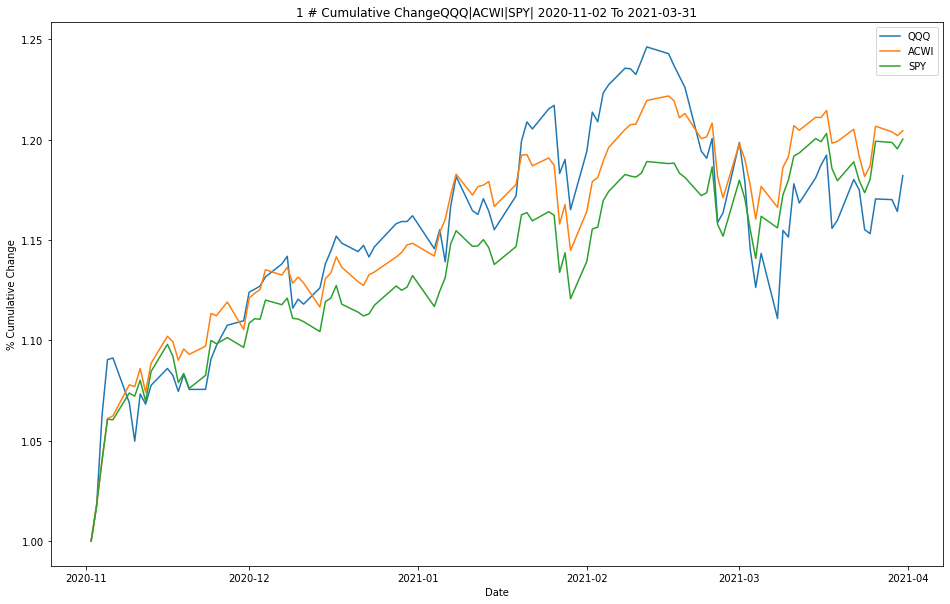

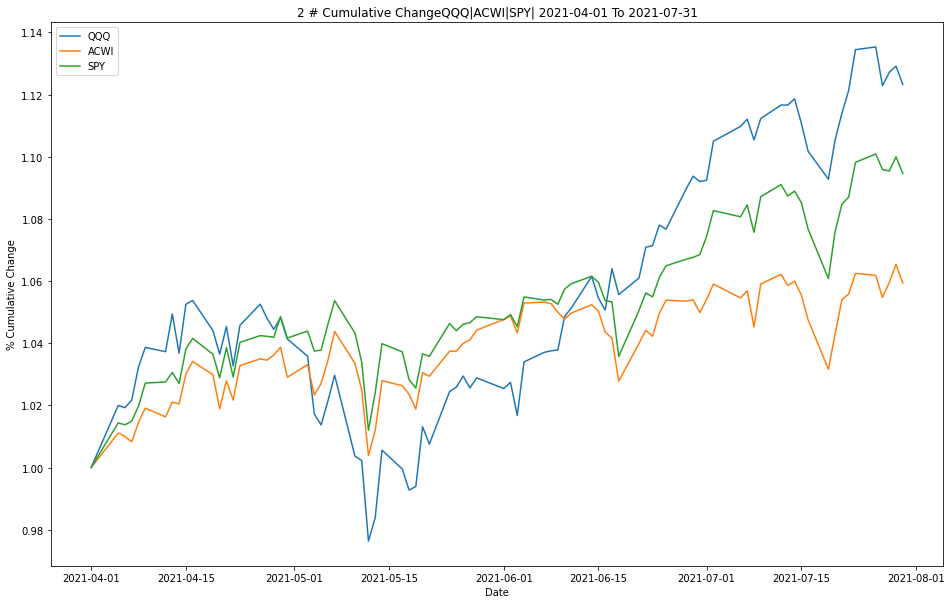

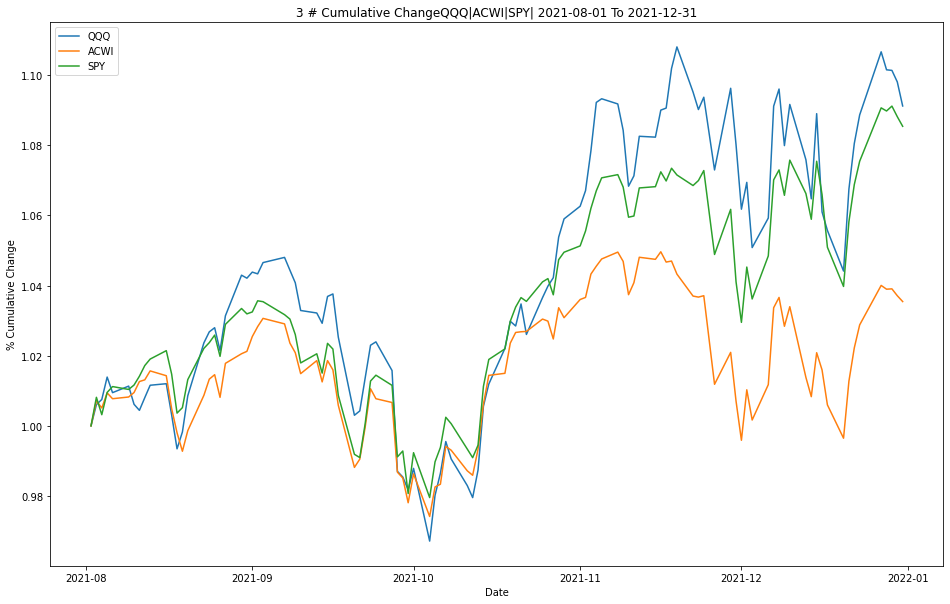

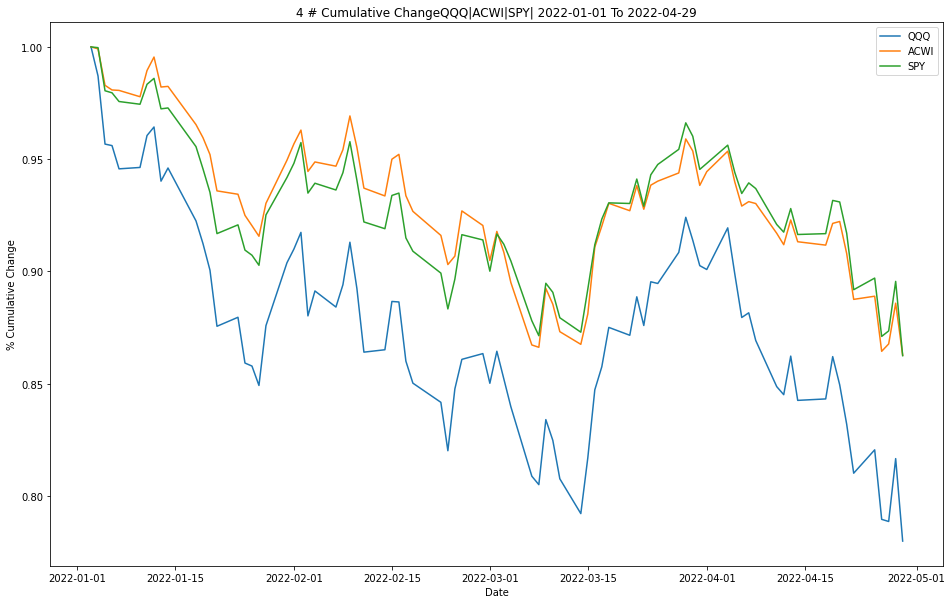

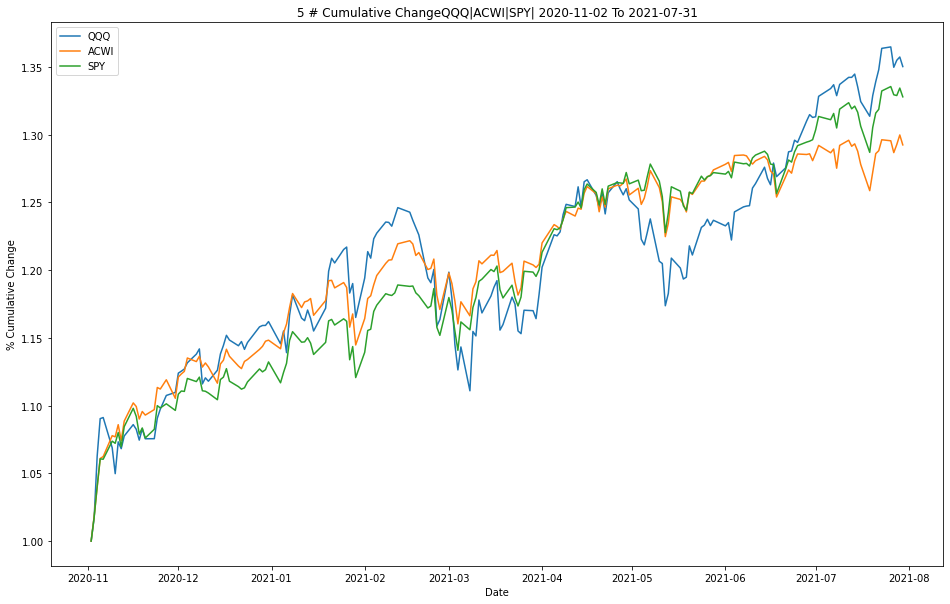

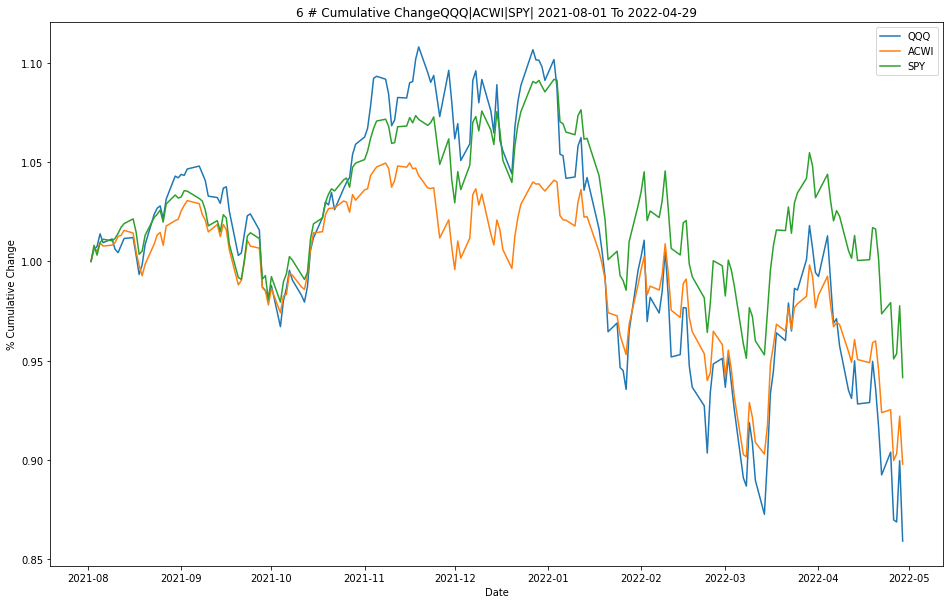

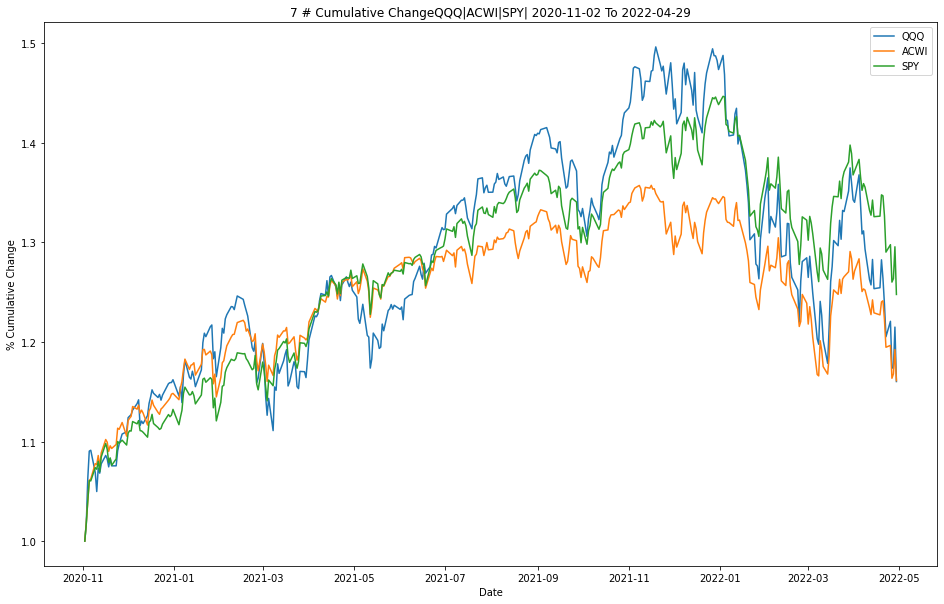

In [116]:
# loop period of time
count_pic=0
for x in array_tf:
    
    x.reset_index(drop=True,inplace=True)
    start_pct=x.loc[0,"Start_Date"].strftime('%Y-%m-%d')
    end_pct=x.loc[len(x)-1,"End_Date"].strftime('%Y-%m-%d')
    
    fig = plt.figure(figsize = (16, 10))
    symbols=''
    for x_name,fund_df in dictPriceOfFund.items():

          df=create_pct_acc_df(fund_df,start_pct,end_pct)  
          #print(f'==========={x_name}==================')    
          #  print(df.head(5))   
          #  print(df.tail(5))    

          plt.plot(df.index,df['cum_return_pct'],label =x_name)
          symbols += f'{x_name}|'

    plt.legend() 
    plt.xlabel("Date")
    plt.ylabel("% Cumulative Change")
    
    count_pic=count_pic+1
    plt.title(f"{count_pic} # Cumulative Change{symbols} {start_pct} To {end_pct}")
    plt.savefig(f'{chart_path}\\{count_pic}#{start_pct}_{end_pct}.png')

    plt.show()



In [88]:
period_df=None
array_tf=None

In [532]:
#fundPerfByPeriod_df.drop(columns=["Start","End","IsSelected","IsActive"],inplace=True)

fundPerfByPeriod_df['Start_Date'] = fundPerfByPeriod_df['Start_Date'].dt.strftime('%d-%m-%Y')
fundPerfByPeriod_df['End_Date'] = fundPerfByPeriod_df['End_Date'].dt.strftime('%d-%m-%Y')

#MAs=[math.ceil(len(fundPerfByPeriod_df)/2),math.ceil(len(fundPerfByPeriod_df)/3)]
no_half_row=math.ceil(len(fundPerfByPeriod_df)/2)


fundPerfByPeriod_df.drop(columns=["Start","End","IsSelected","IsActive"],inplace=True)
fundPerfByPeriod_df.drop(columns=["Start_Date","End_Date"],inplace=True)
dictPriceOfFund=None

start_test=fundPerfByPeriod_df.loc[0,"Period"]
end_test=fundPerfByPeriod_df.loc[len(fundPerfByPeriod_df)-1,"Period"]

fundPerfByPeriod_df

,No.Month,Period,ASP-THEQ,K-FEQ,TLEQ,TSF-A
0,7.0,20Dec16-31Jul17,7.2,5.7,1.4,-2.7
1,8.0,01Aug17-31Mar18,14.5,11.3,9.6,31.5
2,3.0,01Apr18-30Jun18,-13.5,-10.5,-12.1,-10.8
3,3.0,01Jul18-30Sep18,8.5,9.6,6.2,12.5
4,3.0,01Oct18-31Dec18,-14.0,-10.5,-11.9,-11.7
5,7.0,01Jan19-31Jul19,12.1,7.6,14.8,13.8
6,8.0,01Aug19-31Mar20,-29.6,-29.4,-38.9,-27.6
7,3.0,01Apr20-30Jun20,30.2,21.6,32.9,39.8
8,4.0,01Jul20-31Oct20,4.3,-10.0,-5.6,1.0
9,4.0,01Nov20-28Feb21,21.8,29.1,26.0,39.0


In [533]:
print("create combination combination")
def combine_funds(item,listFundsToCombine):
    new_fund_sum=0
    for fundDict in listFundsToCombine:
      
      for  fund_name, fund_weights in fundDict.items():
       #print(fund_name , fund_weights)     
       new_fund_sum+=  item[fund_name]*fund_weights

    new_fund_avg=new_fund_sum
    #print(f'fundDict ={new_fund_avg}')
    return round (new_fund_avg,2)
 


for  mix_symbol  in mix_symbolList:
    for new_fund, fundList in mix_symbol.items():
        
       print(new_fund)
       print(fundList)
    
       fundPerfByPeriod_df[new_fund]= fundPerfByPeriod_df.apply(combine_funds,axis=1,args=(fundList,))
       fundPerfByPeriod_df.apply(combine_funds,axis=1,args=(fundList,))
    
       list_fund_name.append(new_fund)
       list_ex_fund.append(new_fund) 
    
    
print(list_fund_name)
print(list_ex_fund)

create combination combination
['ASP-THEQ', 'K-FEQ', 'TLEQ', 'TSF-A']
[]


In [534]:
print("Show Fund After any mixture funds")
fundPerfByPeriod_df 

Show Fund After any mixture funds


,No.Month,Period,ASP-THEQ,K-FEQ,TLEQ,TSF-A
0,7.0,20Dec16-31Jul17,7.2,5.7,1.4,-2.7
1,8.0,01Aug17-31Mar18,14.5,11.3,9.6,31.5
2,3.0,01Apr18-30Jun18,-13.5,-10.5,-12.1,-10.8
3,3.0,01Jul18-30Sep18,8.5,9.6,6.2,12.5
4,3.0,01Oct18-31Dec18,-14.0,-10.5,-11.9,-11.7
5,7.0,01Jan19-31Jul19,12.1,7.6,14.8,13.8
6,8.0,01Aug19-31Mar20,-29.6,-29.4,-38.9,-27.6
7,3.0,01Apr20-30Jun20,30.2,21.6,32.9,39.8
8,4.0,01Jul20-31Oct20,4.3,-10.0,-5.6,1.0
9,4.0,01Nov20-28Feb21,21.8,29.1,26.0,39.0


In [535]:
print("1-Actual Return")
fund_x=fundPerfByPeriod_df[['Period']+list_fund_name]
fund_x["_AVG_"]=fund_x[list_fund_name].mean(axis=1).round(1)

list_fund_name.append('_AVG_')
list_ex_fund.append('_AVG_')
list_ex_fund.sort(reverse = True)
list_fund_name=list_ex_fund+list(set(list_fund_name).difference(set(list_ex_fund)))


fundPerfByPeriod_df=None

print(list_fund_name)
print(list_ex_fund)
fund_x

1-Actual Return
['_AVG_', 'ASP-THEQ', 'K-FEQ', 'TSF-A', 'TLEQ']
['_AVG_']


,Period,ASP-THEQ,K-FEQ,TLEQ,TSF-A,_AVG_
0,20Dec16-31Jul17,7.2,5.7,1.4,-2.7,2.9
1,01Aug17-31Mar18,14.5,11.3,9.6,31.5,16.7
2,01Apr18-30Jun18,-13.5,-10.5,-12.1,-10.8,-11.7
3,01Jul18-30Sep18,8.5,9.6,6.2,12.5,9.2
4,01Oct18-31Dec18,-14.0,-10.5,-11.9,-11.7,-12.0
5,01Jan19-31Jul19,12.1,7.6,14.8,13.8,12.1
6,01Aug19-31Mar20,-29.6,-29.4,-38.9,-27.6,-31.4
7,01Apr20-30Jun20,30.2,21.6,32.9,39.8,31.1
8,01Jul20-31Oct20,4.3,-10.0,-5.6,1.0,-2.6
9,01Nov20-28Feb21,21.8,29.1,26.0,39.0,29.0


In [536]:
print(f"2.1-Actual the first {no_half_row} +-1 times Return")
fund_xFirstHalf=fund_x.iloc [0:no_half_row,:]   
fund_xFirstHalf.reset_index(drop=True,inplace=True)
fund_xFirstHalf

2.1-Actual the first 7 +-1 times Return


,Period,ASP-THEQ,K-FEQ,TLEQ,TSF-A,_AVG_
0,20Dec16-31Jul17,7.2,5.7,1.4,-2.7,2.9
1,01Aug17-31Mar18,14.5,11.3,9.6,31.5,16.7
2,01Apr18-30Jun18,-13.5,-10.5,-12.1,-10.8,-11.7
3,01Jul18-30Sep18,8.5,9.6,6.2,12.5,9.2
4,01Oct18-31Dec18,-14.0,-10.5,-11.9,-11.7,-12.0
5,01Jan19-31Jul19,12.1,7.6,14.8,13.8,12.1
6,01Aug19-31Mar20,-29.6,-29.4,-38.9,-27.6,-31.4


In [537]:
print(f"2.2-Actual the last {no_half_row} times Return")
fund_xLastHalf=fund_x.iloc [no_half_row:fund_x.shape[0],:]   
fund_xLastHalf.reset_index(drop=True,inplace=True)
fund_xLastHalf

2.2-Actual the last 7 times Return


,Period,ASP-THEQ,K-FEQ,TLEQ,TSF-A,_AVG_
0,01Apr20-30Jun20,30.2,21.6,32.9,39.8,31.1
1,01Jul20-31Oct20,4.3,-10.0,-5.6,1.0,-2.6
2,01Nov20-28Feb21,21.8,29.1,26.0,39.0,29.0
3,01Mar21-31Jul21,8.4,4.1,-2.6,6.1,4.0
4,01Aug21-30Nov21,6.3,5.5,13.3,1.8,6.7
5,01Dec21-27Dec21,4.0,2.3,4.1,4.2,3.6


In [538]:
val_ma=no_half_row
str_MA=f'_MA#{val_ma}'
if requiredMAData:

    print(f"3-Average Return over the last {no_half_row} times")
  
    print(f'Calculate with MA - {val_ma}')

    fund_averageLastHalf=fund_x.copy()
    #fund_averageLastHalf

    for fund_name in list_fund_name:
      fund_averageLastHalf[fund_name]=fund_averageLastHalf[fund_name].rolling(val_ma, min_periods=1).mean().round(1)


    fund_averageLastHalf=fund_averageLastHalf.iloc [no_half_row:fund_averageLastHalf.shape[0],:]   
    #fund_averageLastHalf=fund_averageLastHalf
    fund_averageLastHalf.reset_index(drop=True,inplace=True)
    fund_averageLastHalf=fund_averageLastHalf[['Period']+list_fund_name]
    print(fund_averageLastHalf)
    


In [539]:
def find_rank(fund_temp,list_fundX,FinalRank_ColName):
    fundPerfRank=fund_temp[list_fundX]
    fundPerfRank.index.set_names('Fund-Period',inplace=True)
    fundPerfRank=fundPerfRank.T
    
    for colNameToRank in fundPerfRank.columns:
      fundPerfRank[colNameToRank]=fundPerfRank[colNameToRank].rank(method='max')
    
    fundPerfRank["XAvgRank"]=fundPerfRank.mean(axis=1).round(1)
    
    fundPerfRank[FinalRank_ColName]=fundPerfRank['XAvgRank'].rank(method='max')
    fundPerfRank[FinalRank_ColName]=fundPerfRank[FinalRank_ColName].round(0)
    
    
    fundPerfRank["%Rank"]=fundPerfRank[FinalRank_ColName].rank(method='max',pct = True)
    fundPerfRank["%Rank"]=(fundPerfRank["%Rank"]*100).round(1)
    
    fundPerfRank=fundPerfRank.sort_values(by=FinalRank_ColName,ascending=False)
    
    fundPerfRank=fundPerfRank.drop(columns=['XAvgRank'])
    
    
    return fundPerfRank



In [540]:
def plot_rank_line(df_rank,rank_name):

    rank_x_chart=df_rank.drop(columns=['%Rank'])
    rank_x_chart=rank_x_chart.T
    rank_x_Cols=rank_x_chart.columns.tolist()

    fig = plt.figure(figsize = (20, 12))
    for x_name in rank_x_Cols:   
          plt.plot(rank_x_chart.index,rank_x_chart[x_name],label =x_name)

    X_axis = np.arange(len(rank_x_chart))
    plt.legend() 
    plt.xticks(X_axis, rank_x_chart.index,rotation='vertical')
    plt.xlabel("Date")
    plt.ylabel("Rank Return")

    rotation='vertical'

    plt.title(f"{rank_name}")
    plt.savefig(f'{report_path}\\Rank_{rank_name}.png')

    plt.show()

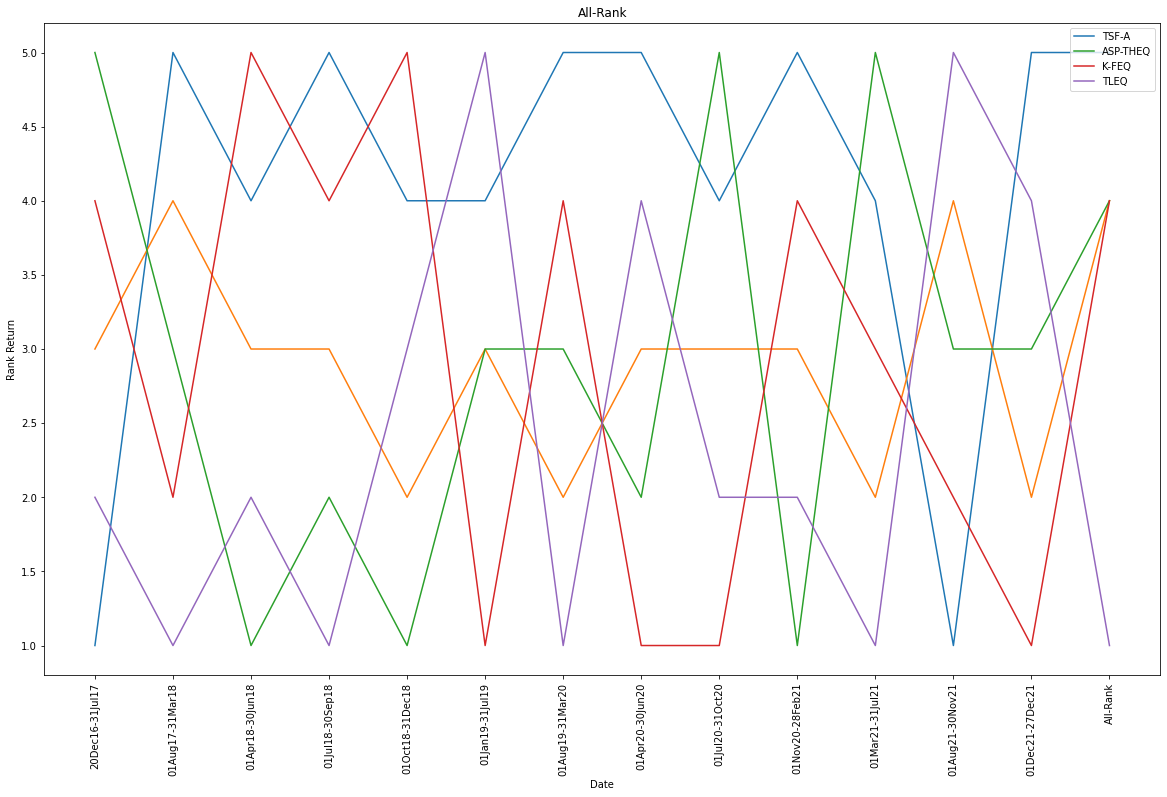

Fund-Period,20Dec16-31Jul17,01Aug17-31Mar18,01Apr18-30Jun18,01Jul18-30Sep18,01Oct18-31Dec18,01Jan19-31Jul19,01Aug19-31Mar20,01Apr20-30Jun20,01Jul20-31Oct20,01Nov20-28Feb21,01Mar21-31Jul21,01Aug21-30Nov21,01Dec21-27Dec21,All-Rank,%Rank
TSF-A,1.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,1.0,5.0,5.0,100.0
_AVG_,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,4.0,2.0,4.0,80.0
ASP-THEQ,5.0,3.0,1.0,2.0,1.0,3.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,4.0,80.0
K-FEQ,4.0,2.0,5.0,4.0,5.0,1.0,4.0,1.0,1.0,4.0,3.0,2.0,1.0,4.0,80.0
TLEQ,2.0,1.0,2.0,1.0,3.0,5.0,1.0,4.0,2.0,2.0,1.0,5.0,4.0,1.0,20.0


In [541]:
fund_x=fund_x.set_index("Period",drop=True)
rankCol_name_all='All-Rank'
rank_x=find_rank(fund_x,list_fund_name,rankCol_name_all)
plot_rank_line(rank_x, rankCol_name_all)
rank_x

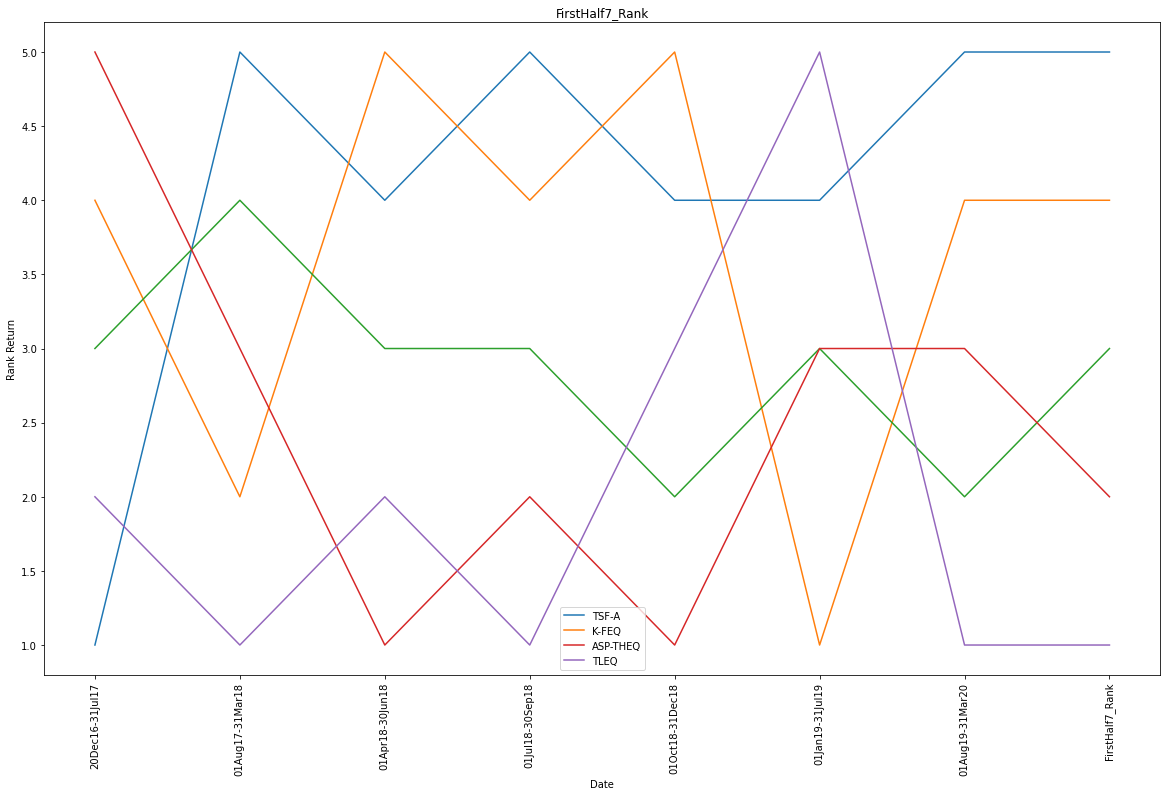

Fund-Period,20Dec16-31Jul17,01Aug17-31Mar18,01Apr18-30Jun18,01Jul18-30Sep18,01Oct18-31Dec18,01Jan19-31Jul19,01Aug19-31Mar20,FirstHalf7_Rank,%Rank
TSF-A,1.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,100.0
K-FEQ,4.0,2.0,5.0,4.0,5.0,1.0,4.0,4.0,80.0
_AVG_,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,60.0
ASP-THEQ,5.0,3.0,1.0,2.0,1.0,3.0,3.0,2.0,40.0
TLEQ,2.0,1.0,2.0,1.0,3.0,5.0,1.0,1.0,20.0


In [542]:
fund_xFirstHalf=fund_xFirstHalf.set_index("Period",drop=True)
rankCol_name_first=f'FirstHalf{val_ma}_Rank'

rank_firstY=find_rank(fund_xFirstHalf,list_fund_name,rankCol_name_first)

plot_rank_line(rank_firstY,rankCol_name_first )
rank_firstY


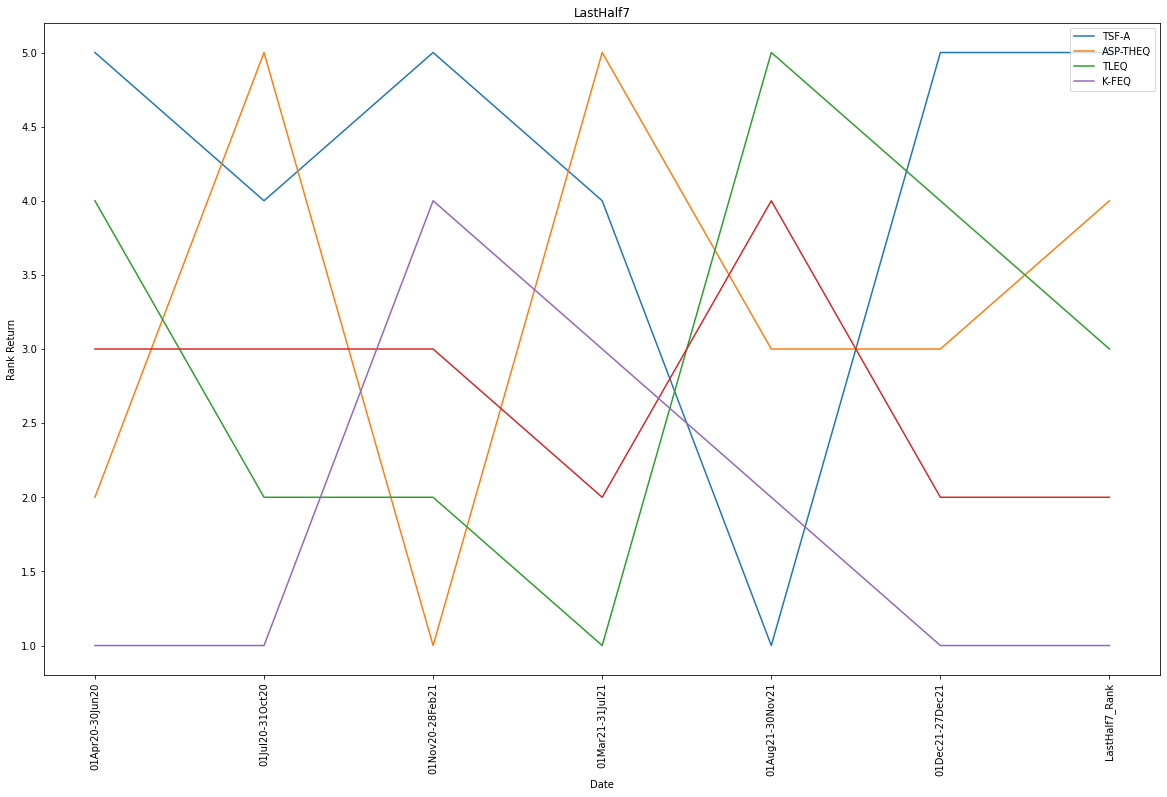

Fund-Period,01Apr20-30Jun20,01Jul20-31Oct20,01Nov20-28Feb21,01Mar21-31Jul21,01Aug21-30Nov21,01Dec21-27Dec21,LastHalf7_Rank,%Rank
TSF-A,5.0,4.0,5.0,4.0,1.0,5.0,5.0,100.0
ASP-THEQ,2.0,5.0,1.0,5.0,3.0,3.0,4.0,80.0
TLEQ,4.0,2.0,2.0,1.0,5.0,4.0,3.0,60.0
_AVG_,3.0,3.0,3.0,2.0,4.0,2.0,2.0,40.0
K-FEQ,1.0,1.0,4.0,3.0,2.0,1.0,1.0,20.0


In [543]:
fund_xLastHalf=fund_xLastHalf.set_index("Period",drop=True)

rankCol_name_last=f'LastHalf{val_ma}_Rank'
rank_y=find_rank(fund_xLastHalf,list_fund_name,rankCol_name_last)

plot_rank_line(rank_y, f'LastHalf{val_ma}')
rank_y

In [544]:
if requiredMAData:
    fund_averageLastHalf=fund_averageLastHalf.set_index("Period",drop=True)
    rankCol_name_MA=f'AvgLastHalf{val_ma}_Rank'
    rank_z=find_rank(fund_averageLastHalf,list_fund_name,rankCol_name_MA)
    plot_rank_line(rank_z, rankCol_name_MA)
    rank_z
    print(rank_z)


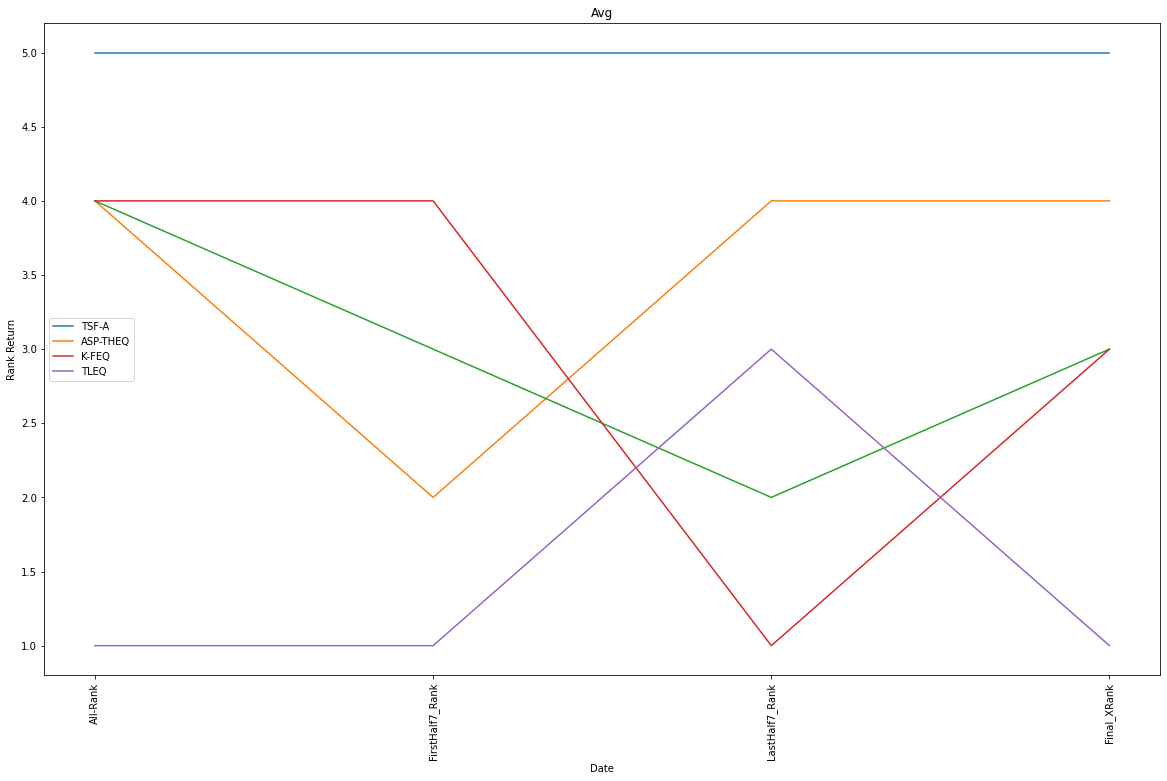

In [545]:
if requiredMAData==False:
 df_xyz_rank=pd.concat([ rank_x[rankCol_name_all],rank_firstY[rankCol_name_first],
                        rank_y[rankCol_name_last]],axis=1)
else:
 df_xyz_rank=pd.concat([ rank_x[rankCol_name_all],rank_firstY[rankCol_name_first], 
                        rank_y[rankCol_name_last],rank_z[rankCol_name_MA]],axis=1)


df_xyz_rank["Avg_XRank"]=df_xyz_rank.mean(axis=1).round(1)
df_xyz_rank["Final_XRank"]=df_xyz_rank["Avg_XRank"].rank(method='max')
    
df_xyz_rank=df_xyz_rank.sort_values(by="Final_XRank",ascending=False)

df_xyz_rank["%Rank"]=df_xyz_rank['Final_XRank'].rank(method='max',pct = True)
df_xyz_rank["%Rank"]=(df_xyz_rank["%Rank"]*100).round(1)

df_xyz_rank=df_xyz_rank.drop(columns=["Avg_XRank"])


plot_rank_line(df_xyz_rank , 'Avg')

In [546]:
   
def cal_statistics_des(x_cols,df_temp):
    
 des_colsOrder=['mean','50%', 'std','max','min','count']  
#  x_cols=x_cols.append("AverageMarket")
#  print(x_cols)
 df_stat_desc=df_temp[x_cols].describe()

 df_stat_desc=df_stat_desc[x_cols].round(1)

 df_stat_desc = df_stat_desc.T
 df_stat_desc=df_stat_desc.loc[:,des_colsOrder]   
 
    
 des_colsOrder=list(df_stat_desc.columns)
 df_stat_desc['mean-50%']= df_stat_desc['mean']-  df_stat_desc['50%']
 des_colsOrder.insert(2,'mean-50%')
 
 df_stat_desc=df_stat_desc.sort_values(by=des_colsOrder,ascending=False)

 df_stat_desc=df_stat_desc[des_colsOrder]
    
 return df_stat_desc,des_colsOrder

In [547]:
df_stat_desc,des_colsOrder=cal_statistics_des(list_fund_name,fund_x)
df_stat_desc



,mean,50%,mean-50%,std,max,min,count
TSF-A,7.5,4.2,3.3,20.0,39.8,-27.6,13.0
ASP-THEQ,4.6,7.2,-2.6,15.8,30.2,-29.6,13.0
_AVG_,4.4,4.0,0.4,16.9,31.1,-31.4,13.0
TLEQ,2.9,4.1,-1.2,18.3,32.9,-38.9,13.0
K-FEQ,2.8,5.5,-2.7,15.2,29.1,-29.4,13.0


In [548]:
dfFirstHalf_stat_desc,des_colsOrder=cal_statistics_des(list_fund_name,fund_xFirstHalf)
dfFirstHalf_stat_desc

,mean,50%,mean-50%,std,max,min,count
TSF-A,0.7,-2.7,3.4,19.8,31.5,-27.6,7.0
_AVG_,-2.0,2.9,-4.9,17.1,16.7,-31.4,7.0
ASP-THEQ,-2.1,7.2,-9.3,16.9,14.5,-29.6,7.0
K-FEQ,-2.3,5.7,-8.0,15.0,11.3,-29.4,7.0
TLEQ,-4.4,1.4,-5.8,18.3,14.8,-38.9,7.0


In [549]:
dfLastHalf_stat_desc,des_colsOrder=cal_statistics_des(list_fund_name,fund_xLastHalf)
dfLastHalf_stat_desc

,mean,50%,mean-50%,std,max,min,count
TSF-A,15.3,5.2,10.1,18.7,39.8,1.0,6.0
ASP-THEQ,12.5,7.4,5.1,10.9,30.2,4.0,6.0
_AVG_,12.0,5.4,6.6,14.4,31.1,-2.6,6.0
TLEQ,11.4,8.7,2.7,15.6,32.9,-5.6,6.0
K-FEQ,8.8,4.8,4.0,14.2,29.1,-10.0,6.0


In [550]:
if requiredMAData:
    dfMA_stat_desc,des_colsOrder=cal_statistics_des(list_fund_name,fund_averageLastHalf)
    print(dfMA_stat_desc)

In [551]:
# df_stat_all=pd.concat([df_stat_desc, dfLastHalf_stat_desc, dfMA_stat_desc])
# df_stat_all=df_stat_all.groupby(level=0).mean().round(1)
# df_stat_all

if requiredMAData:
 avgStatDesc_df=(df_stat_desc+dfFirstHalf_stat_desc+dfLastHalf_stat_desc+dfMA_stat_desc)/4
else:
 avgStatDesc_df=(df_stat_desc+dfFirstHalf_stat_desc+dfLastHalf_stat_desc)/3

avgStatDesc_df=avgStatDesc_df.round(1)
avgStatDesc_df=avgStatDesc_df.sort_values(by=des_colsOrder,ascending=False)
avgStatDesc_df=avgStatDesc_df.drop(columns=["count"])

avgStatDesc_df

,mean,50%,mean-50%,std,max,min
TSF-A,7.8,2.2,5.6,19.5,37.0,-18.1
ASP-THEQ,5.0,7.3,-2.3,14.5,25.0,-18.4
_AVG_,4.8,4.1,0.7,16.1,26.3,-21.8
TLEQ,3.3,4.7,-1.4,17.4,26.9,-27.8
K-FEQ,3.1,5.3,-2.2,14.8,23.2,-22.9


print("Find Min-Max")

def find_min_max(item,list_fund_name,find_x):
    item_dict= item[list_fund_name].to_dict()
    if find_x=="max":
     x_key = max(item_dict, key=item_dict.get)
    else:
     x_key = min(item_dict, key=item_dict.get)
    
    #print(f"{find_x} ={x_key} : {item_dict}")
    return x_key


def  find_mean_best_worst(df_temp,list_fundX):
 
 df_temp["best_fund"]=df_temp.apply(find_min_max,axis=1,args=(list_fundX,'max'))
 df_temp["worst_fund"]=df_temp.apply(find_min_max,axis=1,args=(list_fundX,'min'))

 df_temp=df_temp[['Period','No.Month','best_fund','worst_fund','average']+list_fundX]
 df_temp.set_index('Period',inplace=True)
 return df_temp


fund_x_best_worst=find_mean_best_worst(fund_x,list_fund_name)
fund_xLastHalf_best_worst=find_mean_best_worst(fund_xLastHalf,list_fund_name)


count_best=fund_x.groupby('best_fund').size()
count_worst=fund_x.groupby('worst_fund').size()
print(count_worst)
print("=============================")
print(count_best)

data = {"fund_best": count_best,
        "fund_worst": count_worst,
       }
df_best_worst = pd.concat(data,
               axis = 1)

df_best_worst=df_best_worst[["fund_best","fund_worst"]].fillna(0)

df_best_worst['heaven-hell']=df_best_worst['fund_best']-df_best_worst['fund_worst']
df_best_worst=df_best_worst.sort_values(by=['heaven-hell','fund_best', 'fund_worst'],ascending=False)
df_best_worst


In [552]:
# def plot_bar_performance(df):

#   fig, ax = plt.subplots(figsize = (18, 9))

#   X_axis = np.arange(len(df))
#   X_point=0.00
#   X_width=0.2  
#   listChart=[]  
    
#   for colName  in df.columns:
#     chart=ax.bar(X_axis+X_point,df[colName],X_width, label =colName)
#     X_point+=X_width
#     listChart.append(chart)
    


  
#   ax.set_xlabel("Period")
#   ax.set_ylabel("% Return")
#   ax.set_title("Fund Perforamnce Return")
#   ax.set_xticks(X_axis )
#   ax.set_xticklabels(list(df.index),rotation='vertical')
#   ax.legend()
#update matplotlib    
#   for chart in listChart:
#    ax.bar_label(chart, padding=3)
 
#   fig.tight_layout()  
#   plt.show()

    
def plot_bar_performance(df,x_chart):

  fig = plt.figure(figsize = (20, 10))

  X_axis = np.arange(len(df))
  X_point=0.00
  X_width=0.1  
  listChart=[]  
    
  for colName  in df.columns:
    chart=plt.bar(X_axis+X_point,df[colName],0.1, label =colName)
    X_point+=X_width
    listChart.append(chart)
    
 
  
  plt.xticks(X_axis, df.index,rotation='vertical')
  plt.xlabel("Period")
  plt.ylabel("% Return")
  plt.title(f"Fund Perforamnce Return {x_chart}")
  plt.legend()
   
  plt.savefig(f'{report_path}\\Retun_{x_chart}.png')

  plt.show()


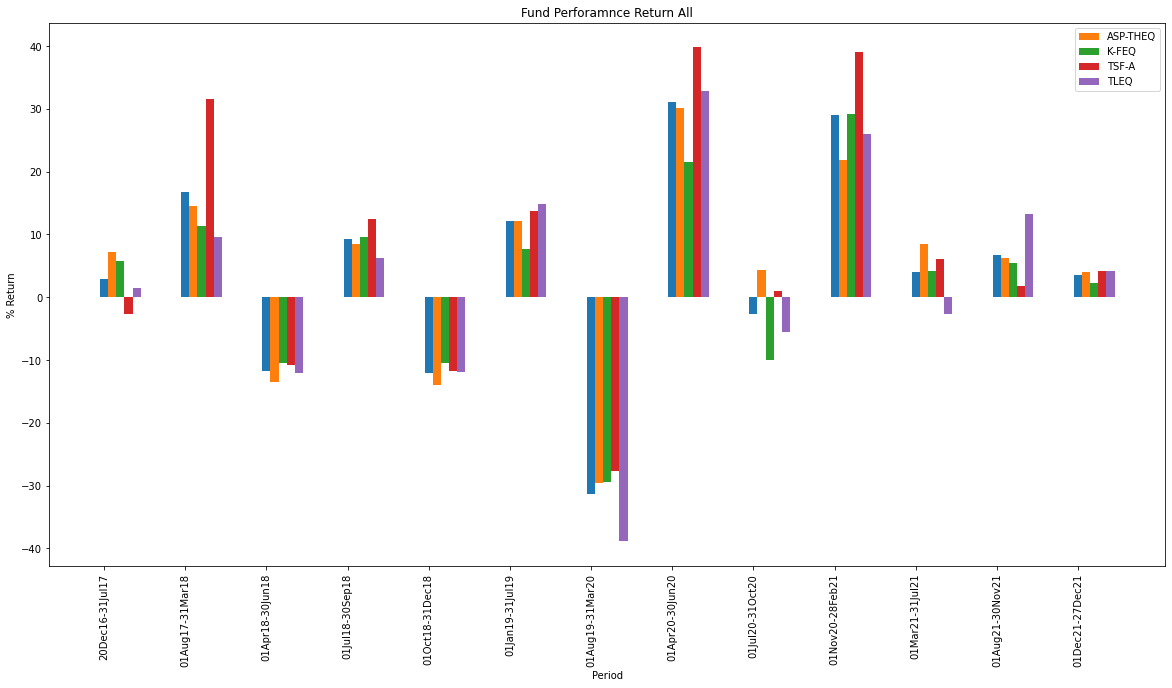

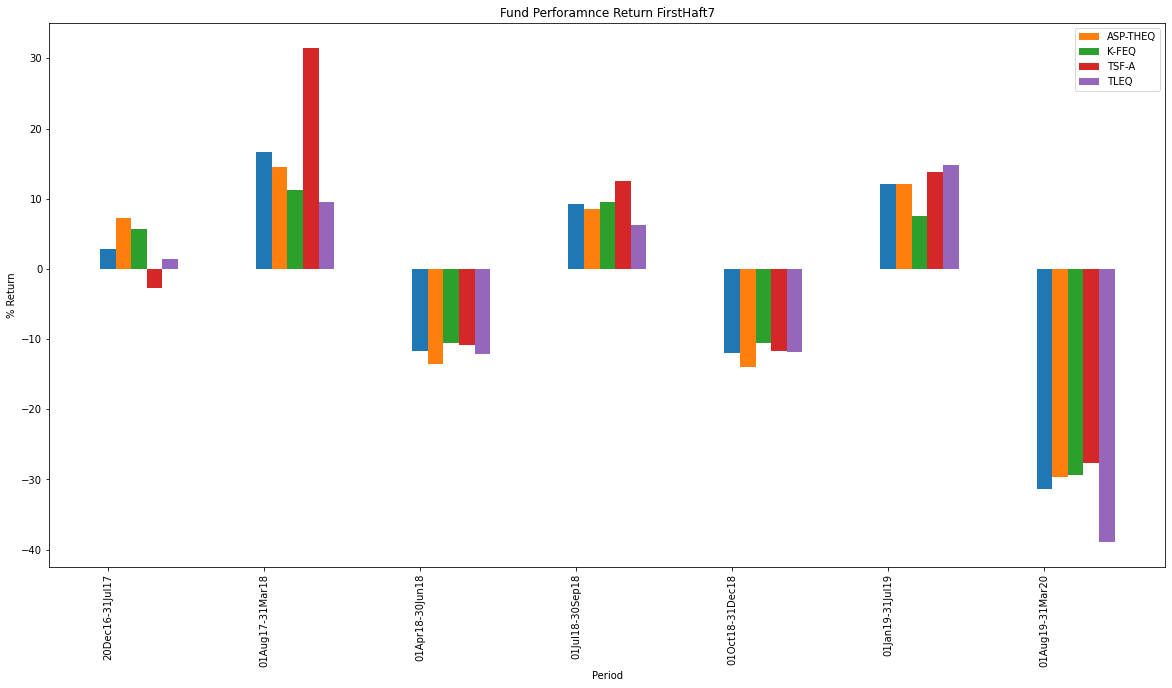

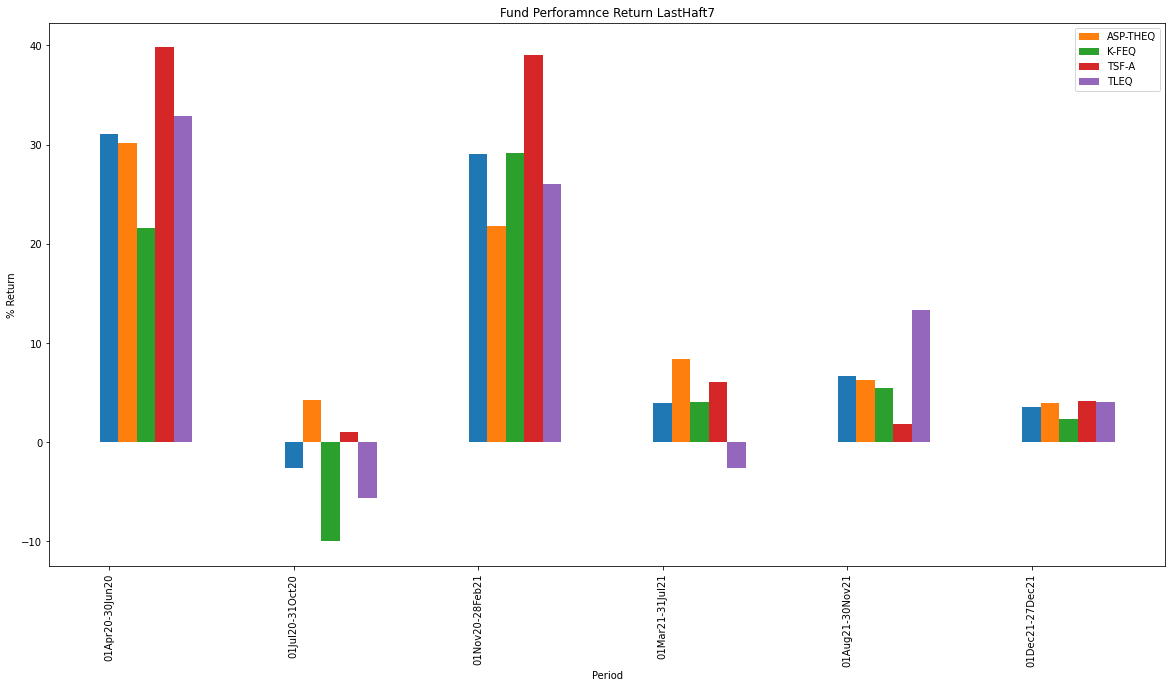

In [553]:
fund_x=fund_x.loc[:,list_fund_name]
fund_xFirstHalf=fund_xFirstHalf.loc[:,list_fund_name]
fund_xLastHalf=fund_xLastHalf.loc[:,list_fund_name]

plot_bar_performance(fund_x,'All')
plot_bar_performance(fund_xFirstHalf,f'FirstHaft{val_ma}')
plot_bar_performance(fund_xLastHalf,f'LastHaft{val_ma}')

if requiredMAData:
    fund_averageLastHalf  =fund_averageLastHalf.loc[:,list_fund_name]
    plot_bar_performance(fund_averageLastHalf,f'AvgLastHalf{val_ma}')

In [554]:
def appped_x_to_last_row(df):
 df_sum=df.sum(axis=0).to_frame(name='__sum')
 df_sum=df_sum.T
    
 df_avg=df.mean(axis=0).to_frame(name='__avg')
 df_avg=df_avg.T 
 df_avg=df_avg.round(1)   
    
 return pd.concat([df,df_sum,df_avg]) 


fund_x=appped_x_to_last_row(fund_x)
fund_xFirstHalf=appped_x_to_last_row(fund_xFirstHalf)
fund_xLastHalf=appped_x_to_last_row(fund_xLastHalf)
if requiredMAData:
    fund_averageLastHalf=appped_x_to_last_row(fund_averageLastHalf)

In [555]:

file_name = f"{title}_{start_test}_{end_test}.xlsx"
result_path=f"{report_path}\\{file_name}"
print(result_path)
print("Create Fund Performance  Report as Excel file")
writer=pd.ExcelWriter(result_path,engine='xlsxwriter') 

df_xyz_rank.to_excel(writer, sheet_name="Rank-Avg",index=True)
avgStatDesc_df.to_excel(writer, sheet_name="StatDes-Avg",index=True)

fund_x.to_excel(writer, sheet_name="Return",index=True)
rank_x.to_excel(writer, sheet_name="Rank",index=True)
df_stat_desc.to_excel(writer, sheet_name="StatDes",index=True)
  

fund_xFirstHalf.to_excel(writer, sheet_name=f"First{val_ma}-Return",index=True)
rank_firstY.to_excel(writer, sheet_name=f"First{val_ma}-Rank",index=True)
dfFirstHalf_stat_desc.to_excel(writer, sheet_name=f"First{val_ma}-StatDes",index=True)


fund_xLastHalf.to_excel(writer, sheet_name=f"FLast{val_ma}-Return",index=True)
rank_y.to_excel(writer, sheet_name=f"FLast{val_ma}-Rank",index=True)
dfLastHalf_stat_desc.to_excel(writer, sheet_name=f"FLast{val_ma}-StatDes",index=True)

if requiredMAData:
    fund_averageLastHalf.to_excel(writer, sheet_name=f"FAvg{val_ma}-Return",index=True)
    rank_z.to_excel(writer, sheet_name=f"FAvg{val_ma}-Rank",index=True)
    dfMA_stat_desc.to_excel(writer, sheet_name=f"FAvg{val_ma}-StatDes",index=True)

writer.save()

print("Successfully")

D:\FundProject\Report-Fund\BEST-THAI#4_291221_0139\BEST-THAI#4_291221_0139_20Dec16-31Jul17_01Dec21-27Dec21.xlsx
Create Fund Performance  Report as Excel file
Successfully
